In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
%matplotlib inline
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# To Enable plotting graphs in Jupyter Notebook
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
col=["Preg","Glc","BP","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]

data=pd.read_csv("pima-indians-diabetes-1.data",names=col)

In [4]:
data.head()

,Preg,Glc,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glc,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


3

array([1, 2, 3], dtype=int64)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg                        768 non-null int64
Glc                         768 non-null int64
BP                          768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
data.isnull().sum()

Cultivator       0
Alcohol          0
Malic_acid       0
Ash              0
Acl              0
Mg               0
Phenols          0
Flavanoids       0
NonFlavanoids    0
Proanth          0
Color            0
Hue              0
Od               0
Proline          0
dtype: int64

In [28]:
data.shape        # by looking at the columns i.e 14, the rows should greater than (no of columns)^2

(178, 14)

In [23]:
data.head()

,Preg,Glc,BP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
y=data["Outcome"]
x=data.iloc[:,0:7]

x_std=StandardScaler().fit_transform(x)      
# scaling of Input, don't scale output(because it is categorical), we can also use Z score, this is another method
x=x_std

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=2)

In [50]:

rfmodel=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
rfmodel.fit(x_train,y_train)
ypred=rfmodel.predict(x_test)


In [51]:

model=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
model.fit(x_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [52]:
acc=metrics.accuracy_score(y_test,ypred)
acc

0.7532467532467533

In [53]:
pd.crosstab(y_test,ypred)

col_0,0,1
Outcome,,
0,146,9
1,48,28


In [54]:
cr=metrics.classification_report(y_test,ypred)
print(cr)

             precision    recall  f1-score   support

          0       0.75      0.94      0.84       155
          1       0.76      0.37      0.50        76

avg / total       0.75      0.75      0.72       231



In [58]:
print(pd.DataFrame(rfmodel.feature_importances_,columns=["IMP"],index=x_train.columns)) 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [56]:
models=[]
models.append(('Decision Tree',model))
models.append(('Random Forest',rfmodel))


Decision Tree: 0.742188 ,(variance error is 0.016877)
Random Forest: 0.751302 ,(variance error is 0.021236)


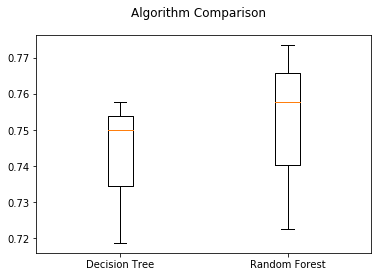

In [57]:
results=[]
names=[]
scoring='accuracy'
for name, model in models:
    kfold=model_selection.KFold(n_splits=3,random_state=2)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f ,(variance error is %f)"%(name,cv_results.mean(),cv_results.std())
    print(msg)

fig=plt.figure()
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [47]:
results

[array([0.71875  , 0.75     , 0.7578125]),
 array([0.72265625, 0.75      , 0.78125   ])]